In [147]:
import numpy as np
import pandas as pd # alias

In [148]:
# Reading Dataset

path = "/content/Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv"
df = pd.read_csv(path)

In [149]:
# head shows the first few rows (by default 5) of the dataframe
df.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [150]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000


In [151]:
# tail shows the last few rows (by default 5) of the Dataframe
df.tail(3)

,Date,Open,High,Low,Close,Volume,Stock Trading
1223,2012-01-06,13990,14030,13790,13850,765500,10635609000
1224,2012-01-05,13720,13840,13600,13800,511500,7030811000
1225,2012-01-04,14050,14050,13700,13720,559100,7719804000


In [152]:
df = df['Open']
df.head()

0    42120
1    43000
2    43940
3    43140
4    43310
Name: Open, dtype: int64

In [153]:
# Plotting the time series

# Creating a function to plot the time series

import matplotlib.pyplot as plt

def plot_series(data):

  for df in data:
    plt.plot(df)
  plt.show()

In [154]:
# Splitting the dataset in Test and Train set

train = df[:int(0.8*len(df))]
test = df[int(0.8*len(df)):]

In [155]:
# Reshaping the data into the required form to be fed into the RNN

def arrange(data, window=10):
  x = []
  y = []

  # Loop through the data
  for i, val in enumerate(data):
    if i<window:
      # if there are not enough number of records avaulable in the past, then continue
      continue  
    x.append(data[i-window: i-1].values.reshape(-1, 1))
    y.append(data[i:i+1].values.reshape(-1,1))

  # convert the list into numpy array
  # NOTE: It's not a necessary step, but, it's generally used as numpy array do the computations faster than the python
  x = np.asarray(x)
  y = np.asarray(y)

  return x,y


In [156]:
X_train, y_train = arrange(train, 15)

print("x-shape is: {} and y-shape is: {}".format(X_train.shape, y_train.shape))

x-shape is: (965, 14, 1) and y-shape is: (965, 1, 1)


In [157]:
# Let's see how a data point looks like
print(X_train[0])
print(y_train[0])

[[42120]
 [43000]
 [43940]
 [43140]
 [43310]
 [43660]
 [43900]
 [42910]
 [42790]
 [43350]
 [43440]
 [43300]
 [43130]
 [43950]]
[[41480]]


In [158]:
# Building the Model

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Input

In [159]:
Net = Sequential()
Net.add(SimpleRNN(3, activation='relu', input_shape = X_train.shape[1:]))
Net.add(Dense(1, activation='relu'))

Net.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (None, 3)                 15        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [160]:
Net.compile(loss = 'mean_squared_error', optimizer='adam', metrics=['mse'])

Net.fit(X_train, y_train, epochs=10)

Epoch 1/10
31/31 [==============================] - 1s 2ms/step - loss: 1107745280.0000 - mse: 1107745280.0000
Epoch 2/10
31/31 [==============================] - 0s 2ms/step - loss: 1005774848.0000 - mse: 1005774848.0000
Epoch 3/10
31/31 [==============================] - 0s 2ms/step - loss: 889432384.0000 - mse: 889432384.0000
Epoch 4/10
31/31 [==============================] - 0s 2ms/step - loss: 762796800.0000 - mse: 762796800.0000
Epoch 5/10
31/31 [==============================] - 0s 2ms/step - loss: 634575360.0000 - mse: 634575360.0000
Epoch 6/10
31/31 [==============================] - 0s 2ms/step - loss: 508414528.0000 - mse: 508414528.0000
Epoch 7/10
31/31 [==============================] - 0s 3ms/step - loss: 281950816.0000 - mse: 281950816.0000
Epoch 8/10
31/31 [==============================] - 0s 2ms/step - loss: 15593528.0000 - mse: 15593528.0000
Epoch 9/10
31/31 [==============================] - 0s 2ms/step - loss: 8538317.0000 - mse: 8538317.0000
Epoch 10/10
31/31 [==

In [161]:
X_test, y_test = arrange(test, 15)
pred = Net.predict(X_test)
pred

array([[20315.045 ],
       [19965.3   ],
       [19623.406 ],
       [20121.066 ],
       [20383.963 ],
       [19819.84  ],
       [19252.752 ],
       [19448.    ],
       [19422.014 ],
       [18871.332 ],
       [18634.08  ],
       [18739.453 ],
       [18606.12  ],
       [18251.969 ],
       [18270.16  ],
       [18094.85  ],
       [17943.697 ],
       [18114.861 ],
       [17925.418 ],
       [17552.402 ],
       [17710.418 ],
       [17825.025 ],
       [17358.652 ],
       [17020.4   ],
       [17433.086 ],
       [17443.293 ],
       [16940.125 ],
       [16801.635 ],
       [17118.295 ],
       [17124.818 ],
       [16784.797 ],
       [16666.219 ],
       [17259.955 ],
       [17377.53  ],
       [17035.416 ],
       [16962.434 ],
       [17118.508 ],
       [17287.793 ],
       [17209.717 ],
       [17410.424 ],
       [17982.674 ],
       [17785.467 ],
       [17176.732 ],
       [17081.26  ],
       [17190.031 ],
       [17027.588 ],
       [16677.074 ],
       [16881

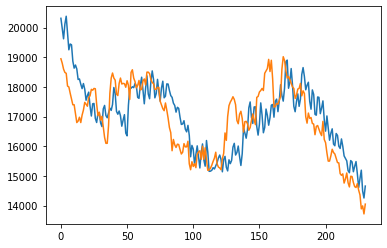

In [162]:
# Comparing predictions with the actual value using the plot
plot_series([pred[:,0], y_test[:,:,0]])